In [78]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [79]:
fetch_housing_data()

In [80]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [81]:
housing = load_housing_data()

In [82]:
features = ['longitude', 'latitude']
housing_selected_features = housing[features]
housing_selected_features.head()

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [83]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([("imputer", SimpleImputer(strategy="median"))])

In [84]:
housing_preprocessed = pipeline.fit_transform(housing_selected_features)

In [101]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(housing_preprocessed) for k in range(1, 9)]
inertias = [model.inertia_ for model in kmeans_per_k]

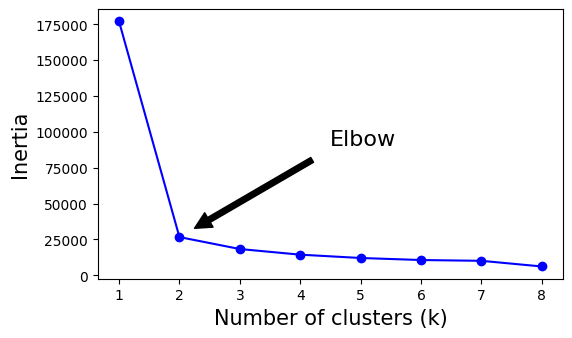

In [106]:
plt.figure(figsize=(6, 3.5))
plt.plot(range(1, 9), inertias, "bo-")
plt.xlabel("Number of clusters (k)", fontsize=15)
plt.ylabel("Inertia", fontsize=15)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
# plt.axis([1, 10.5, 0, 1300])
plt.savefig("inertia_vs_k_plot")
plt.show()

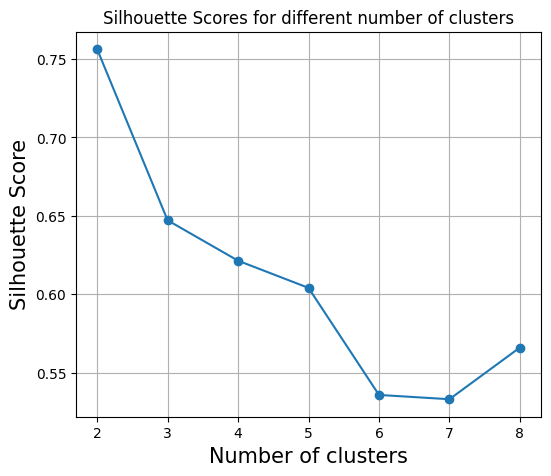

In [107]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []

for num_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(housing_preprocessed)

    silhouette = silhouette_score(housing_preprocessed, labels)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(6, 5))
plt.plot(range(2, 9), silhouette_scores, marker='o')
plt.title("Silhouette Scores for different number of clusters")
plt.xlabel("Number of clusters", fontsize=15)
plt.ylabel("Silhouette Score", fontsize=15)
plt.grid(True)
plt.show()


In [121]:
import matplotlib.pyplot as plt

def create_custom_cmap():
    from matplotlib.colors import LinearSegmentedColormap

    colors = [(0, 0, 0.5), (0, 0, 1), (0, 1, 0), (1, 1, 0), (1, 0.5, 0), (1, 0, 0)]
    return LinearSegmentedColormap.from_list("custom_gradient", colors)

def plot_data(X, income, cmap='RdBu_r'):
    scatter = plt.scatter(X[:, 0], X[:, 1], c=income, cmap=create_custom_cmap(), s=2, vmin=income.min(), vmax=income.max())
    plt.colorbar(scatter, label="Median Income")

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k', labels=None):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

    if labels is not None:
        for i, (x, y) in enumerate(centroids):
            plt.annotate(f'Cluster {labels[i]}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='black')

def plot_decision_boundaries(clusterer, X, income, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True, labels=None):
    import numpy as np

    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')

    plot_data(X, income)

    if show_centroids:
        plot_centroids(clusterer.cluster_centers_, labels=labels)

    if show_xlabels:
        plt.xlabel("longitude", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("latitude", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

   cluster_labels  mean_median_income
0               0            3.921376
1               1            3.801000


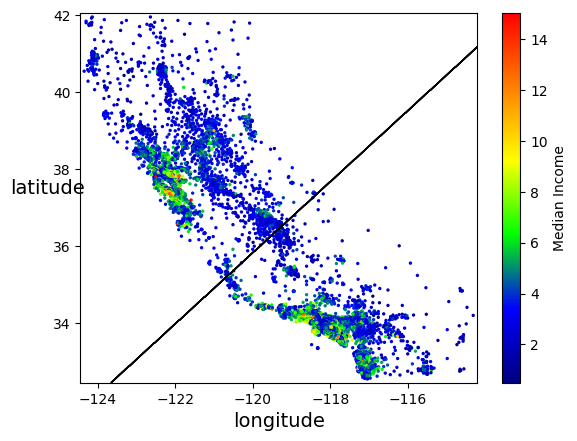

   cluster_labels  mean_median_income
0               0            3.985873
1               1            3.910442
2               2            3.014010


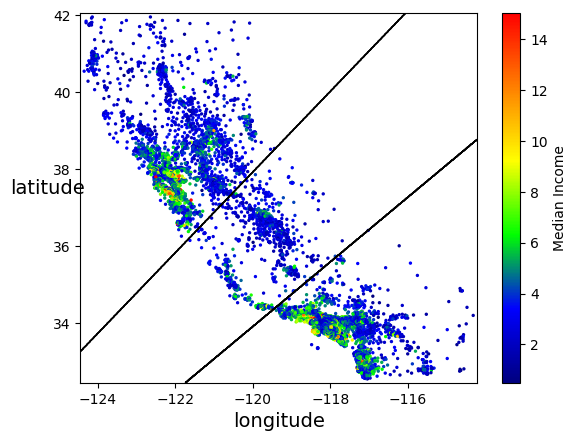

   cluster_labels  mean_median_income
0               0            3.986188
1               1            4.103348
2               2            3.020481
3               3            2.552743


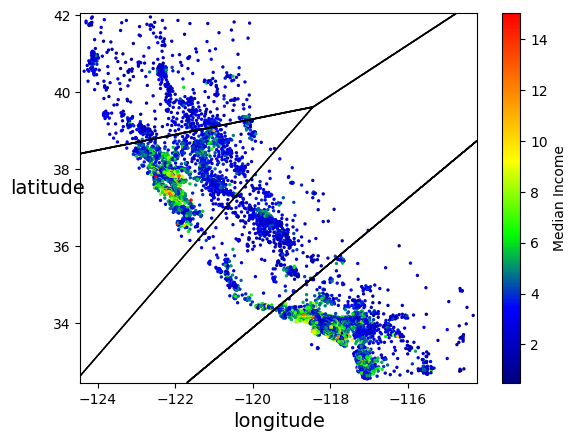

   cluster_labels  mean_median_income
0               0            3.985548
1               1            4.467357
2               2            3.032863
3               3            2.471842
4               4            3.138631


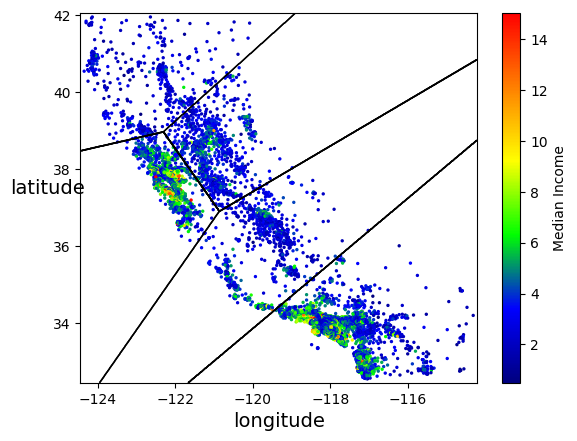

   cluster_labels  mean_median_income
0               0            3.958495
1               1            4.463299
2               2            2.796466
3               3            2.467147
4               4            3.156784
5               5            3.831254


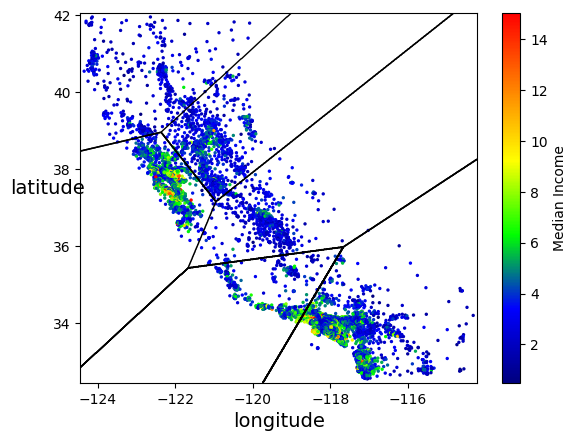

   cluster_labels  mean_median_income
0               0            3.958495
1               1            4.472000
2               2            2.795398
3               3            2.378133
4               4            2.525315
5               5            3.835685
6               6            3.225416


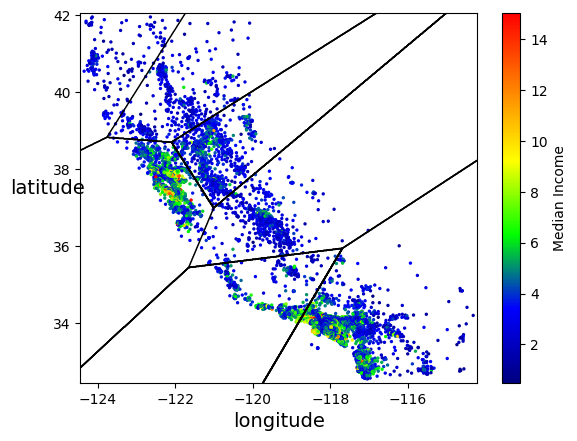

In [117]:
median_income = housing["median_income"].values

for num_clusters in range(2, 8):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(housing_preprocessed)

    df_with_labels = pd.DataFrame(housing_preprocessed, columns=['longitude', 'latitude'])
    df_with_labels['median_income'] = median_income
    df_with_labels['cluster_labels'] = labels

    mean_income_per_cluster = df_with_labels.groupby('cluster_labels')['median_income'].mean().reset_index()
    mean_income_per_cluster.columns = ['cluster_labels', 'mean_median_income']

    print(mean_income_per_cluster)
    plt.figure()
    plot_decision_boundaries(kmeans, housing_preprocessed, median_income, show_centroids=False)
    plt.show()

   cluster_labels  mean_median_income
0               0            3.985548
1               1            4.467357
2               2            3.032863
3               3            2.471842
4               4            3.138631


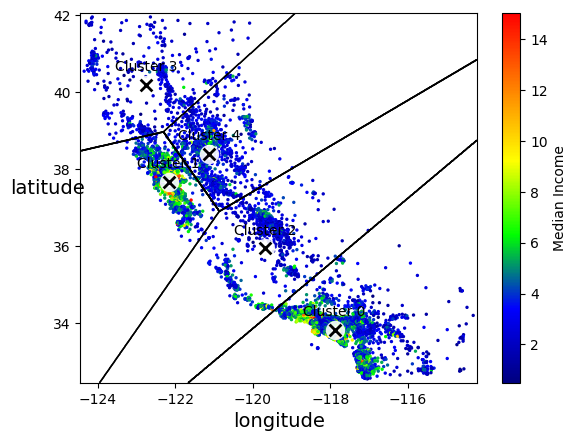

In [122]:

median_income = housing["median_income"].values

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(housing_preprocessed)

df_with_labels = pd.DataFrame(housing_preprocessed, columns=['longitude', 'latitude'])
df_with_labels['median_income'] = median_income
df_with_labels['cluster_labels'] = labels

mean_income_per_cluster = df_with_labels.groupby('cluster_labels')['median_income'].mean().reset_index()
mean_income_per_cluster.columns = ['cluster_labels', 'mean_median_income']

print(mean_income_per_cluster)
plt.figure()
plot_decision_boundaries(kmeans, housing_preprocessed, median_income, show_centroids=True, labels=np.arange(5))
plt.show()
